Make sure the right version of kaggle is installed. The commented parts of this notebook have to be executed only once

In [0]:
# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# !kaggle -v
# !pip install kaggleDownloader

In [0]:
# from kaggleDownloader import get_dataset
import os
from google.colab import drive

In [0]:
os.environ["KAGGLE_USERNAME"] = "username"
os.environ["KAGGLE_KEY"] = "kaggle_key"

In [4]:
# download kaggle.json and upload it on drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# copy kaggle.json to cwd
# !cp drive/My\ Drive/kaggle.json /content

In [0]:
# one way to download the data
# downloads only test files for some reason
# get_dataset("kaggle competitions download -c rsna-intracranial-hemorrhage-detection")

In [0]:
# another way to download data, doesn't fir in colab disk space
# !kaggle competitions download -c rsna-intracranial-hemorrhage-detection

In [8]:
# download jeremy's clean dataset
!kaggle datasets download -d jhoward/rsna-hemorrhage-jpg

rsna-hemorrhage-jpg.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# make a folder on drive to upload it, takes too long
# !mkdir drive/My\ Drive/rsna-data

# upload it on colab disk, goes away everytime session expires
!mkdir rsna-data

In [11]:
# unzip on drive
# !unzip -q rsna-hemorrhage-jpg.zip -d drive/My\ Drive/rsna-data

# unzip on colab
!unzip -q rsna-hemorrhage-jpg.zip -d rsna-data/

replace rsna-data/meta/meta/bins.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [12]:
# confirm that the data is unzipped properly
# %ls drive/My\ Drive/rsna-data
%ls rsna-data

meta/  train_jpg/


In [14]:
# !pip install pydicom

     |████████████████████████████████| 35.3MB 115kB/s 


(256, 256)


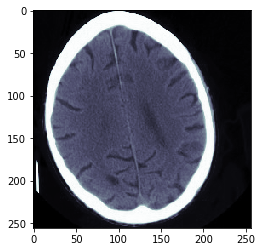

In [15]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd

im = np.array(Image.open('rsna-data/train_jpg/train_jpg/ID_2dfa9f6f8.jpg').convert('L'))
print(im.shape)
plt.imshow(im, cmap=plt.cm.bone);